<a href="https://colab.research.google.com/github/ShubhKjoshi/Cardiovascular_Risk-prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**
***
Before going deep into the project, Lets understand what are Cardiovascular diseases and some of their major causes.

**Cardiovascular diseases**, also called CVDs, are the leading cause of death globally, **causing an estimated 17.9 million deaths each year**. 

**CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions**. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**. 

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths.

If you want to know more, Plz visit : https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1



# **Problem Statement and Objective :**

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information.
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description :**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

This dataset has the following 17 variables as explanatory variables:

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke 
(Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Importing necessary libraries**

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Importing warnings library. The warnings module handles warnings in Python. 
# Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Support vector machine Classifier.
from sklearn import svm

# Importing XGB Classifier.
import xgboost as xgb

# Importing Tensorflow for neural networks.
from tensorflow import keras
import tensorflow as tf

# Importing Sklearn metrics for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

# Importing SMOTE and Tomek for handling class imbalancies.
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Importing Counter.
from collections import Counter

# **Loading the dataset and Exploring it...**

We will load the dataset from the drive and understand it. What features do we have and how are we going to process them etc..

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path ='/content/drive/MyDrive/Projects_capstones/CARDIOVASCULAR RISK PREDICTION_CAPSTONE PROJECT/'

# Importing Cardiovascular risk Data File.
Cardio_df = pd.read_csv(Data_path + "data_cardiovascular_risk.csv")

# Observing the dataset
Cardio_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


Now lets see few records...

In [ ]:
# First 5 rows from the dataset..
Cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Last 5 rows from the dataset..
Cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# Shape of the dataset
Cardio_df.shape

(3390, 17)

We have 3390 rows and 17 columns in the dataset..

In [ ]:
# Observe columns from the dataset
Cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

This is the list of columns that we have ...we discussed them above in data description.

In [ ]:
# Description of all columns in the dataset.
Cardio_df.describe(include = 'all').T   # T will give transpose of the output..and we are including all columns...

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [ ]:
# .info gives the information about the dataset , columns their data type and  null count etc..
Cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see their are null values present in totChol,  BMI, glucose , BPMeds ,cigsPerDay,   education has some null values and  heartRate has 1 null value..

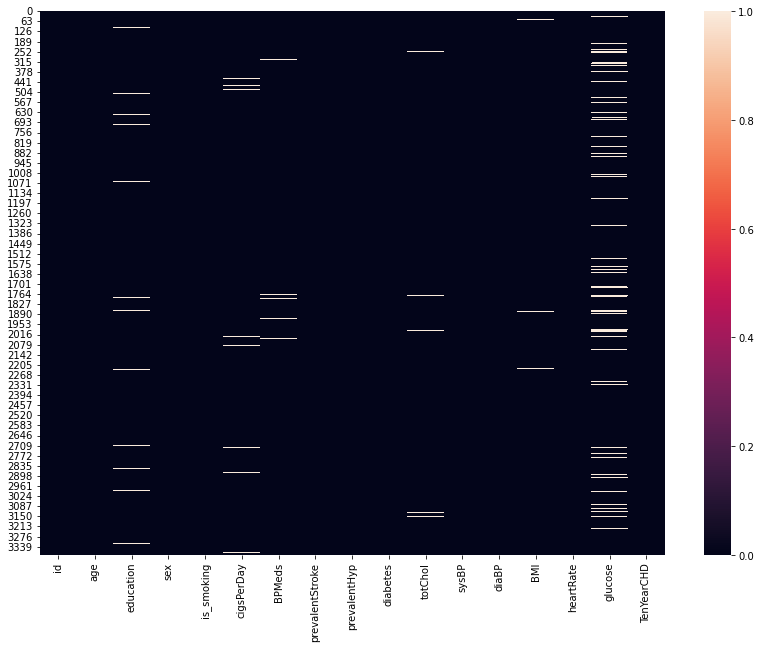

In [ ]:
# Plotting the heatmap for missing values 
missing_values = Cardio_df.isnull()  #store the null values from dataset
plt.figure(figsize=(14,10))
sns.heatmap(missing_values)

We will try to see the count and percentage of null values in the particular column with respect to the complete dataset..

In [ ]:
# It will show columns that have at least one null value.
missing_val = Cardio_df.columns[Cardio_df.isnull().any()].tolist()

# printing missing value counts for various columns.
print('Missing value Count')
print(Cardio_df[missing_val].isnull().sum().sort_values(ascending = False))  # printing missing values in descending ...
print('___'*12)
print('___'*12)

# printing missing value percentages for various columns.
print('Missing value Percentage')
print(round(Cardio_df[missing_val].isnull().sum().sort_values(ascending = False)/len(Cardio_df)*100,2))  # Dividing by totalrecords lenght and multiplying by 100 to get percentage.

Missing value Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
____________________________________
____________________________________
Missing value Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


glucose and education column have more null values. Usually we replace this null values with the help of other records. But , in this particular case the dataset is related to medical domain,that said, the entries in this dataset are person specific and the values vary among different individuals. Hence the most logical option that we have to deal with such values is removing the rows with any null value.

If we try to impute null values using advanced techniques it may affect the result as those values will be inaccurate and we can't take any risks in this prediction.

# **EDA And Feature Engineering**

Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. It’s a scientific approach to get the story of the data.

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises.

Feature engineering mainly have two goals:

   *  Preparing the proper input dataset, compatible with the machine learning   algorithm requirements.

   *  Improving the performance of machine learning models.
   
Lets start by handling the null values that we found out earlier..

In [ ]:
# dropping the missing value since we cannot fill it using imputing techniques as 
# this data is related to medical domain (hence varies from person to person).
New_df = Cardio_df.dropna(how = "any")  #Drop any record with null value ..

# Checking if there's still any null values left.
New_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now the dataset is free of all the null values..
The patient ID column is of no use for our objective so we will drop the column..

In [ ]:
#Dropping the column id from the dataset..
New_df =New_df.drop(columns =['id'])

In [ ]:
New_df.columns  #Have a look at remaining columns..

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Target Variable -TenYearCHD**

We will try to observe our target variable ...

In [ ]:
#Checking the count of how many people have risk ...
New_df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

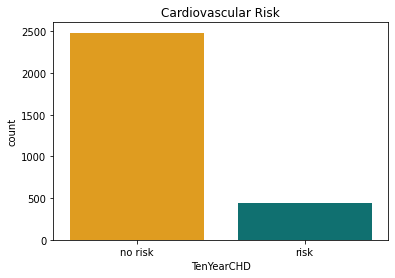

In [ ]:
# plotting number of patients at risk of CHD vs those whose results are normal.
my_palette = {0 : 'orange' , 1 : 'teal'}
X = sns.countplot(New_df['TenYearCHD'],palette =my_palette)
X.set_xticklabels(['no risk','risk'])  #settiing xtitle for labels
X.set_title('Cardiovascular Risk') # setting Title
plt.show()

It is clear the percentage/count of people with normal results are pretty high and this creates a problem of class imbalance. It could create problems for model to perform better in such case because the model will be baised towards the normal result predictions..

So we have to convert this data into a balance class, we can achieve so by using different sampling techniques(udersampling or oversampling), during train/test split.

## Gender

In [ ]:
# Counting the number of males and females.
New_df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

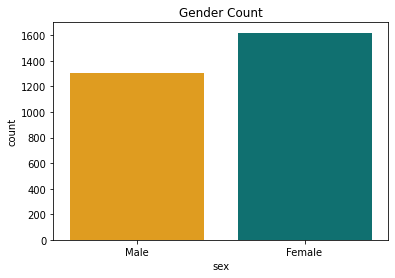

In [ ]:
# Plotting the bar graph with number of males and females.
my_palette = {'M' : 'orange' , 'F': 'teal'}
X = sns.countplot(New_df['sex'], palette = my_palette) # plotting countplot
X.set_xticklabels(['Male','Female'])# settiing xtitle for labels
X.set_title('Gender Count') #writing title
plt.show()

Number of Female records are more than Male records in the dataset.

In [ ]:
#converting sex column into binary..
New_df['sex'] = New_df['sex'].map({'M' : 1,'F' : 0}) # Mapping 0 value to Female and 1 to Male

## Daibetes

In [ ]:
New_df.diabetes.value_counts() # Value count for diabetes or not

0    2848
1      79
Name: diabetes, dtype: int64

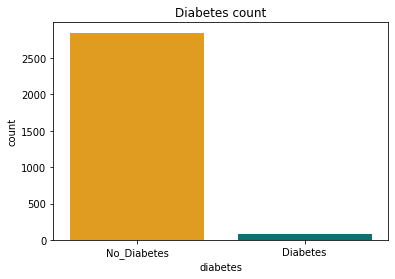

In [ ]:
# Plotting countplot for diabetic column
my_palette = {0 : 'orange' , 1 : 'teal'}
X =sns.countplot(New_df['diabetes'],palette = my_palette)
X.set_xticklabels(['No_Diabetes','Diabetes']) 
X.set_title('Diabetes count')  #setting the title
plt.show()

Only 79 people are diabetic in the data ..There is a large difference in the data ...(bias towards non diabetic )

## Is_smoking

In [ ]:
New_df.is_smoking.value_counts()  #checking value counts for is_smoking column..

NO     1480
YES    1447
Name: is_smoking, dtype: int64

Converting Is_smoking column into binary(0 and 1)

In [ ]:
# Converting "is_smoking" into binary(1 for people who smokes and 0 for those who does'nt).
New_df['is_smoking'] = New_df['is_smoking'].map({'YES':1 ,'NO': 0})   #Just like gender we converted this column into binary.

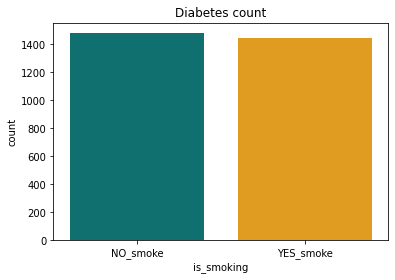

In [ ]:
my_palette = {1: 'orange' , 0 : 'teal'}
X =sns.countplot(New_df['is_smoking'],palette = my_palette)
X.set_xticklabels(['NO_smoke','YES_smoke']) 
X.set_title('Diabetes count')  #setting the title
plt.show()

This column has same number of categories...

We will observe the smoking pattern through different gender ...

In [ ]:
# Number of males who smokes cigarette.
Male_smokers = New_df.loc[(New_df['is_smoking']==1) & (New_df['sex']== 1)] #if is_smoking=1 and it is a Male then it will count as Male smoker
Male_smokers.shape[0] #only interested in rows (count)

801

In [ ]:
# Number of Females who smokes cigarette.
Female_smokers = New_df.loc[(New_df['is_smoking']==1) & (New_df['sex']==0)] #if is_smoking =1 and it is a Female then it will count as Female smoker
Female_smokers.shape[0] #only interested in rows (count)

635

809 Males smokers and 638 Female smokers Who at least smokes 1 Cigarette a day .

Its clear that number of males who smokes are significantly higher than the female smokers, even though the entries for female patients were more. This shows smoking is more common in males and its a major cause of CHDs for male patients.

## Disease Vs Age

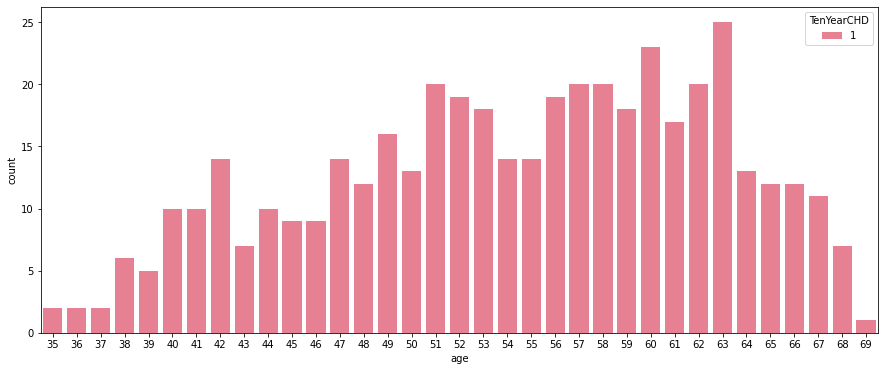

In [ ]:
positive_cases = New_df[New_df['TenYearCHD'] == 1]  # Cardioascular risk detected count vs Age.. 
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

Cardiovascular Risk is gradually increasing with age. Its more in between age 51 to 63 

In [ ]:
#seperating the numerical and categorical features..
Categorical_features = [i for i in New_df.columns if New_df[i].nunique()<=4]   #Looping through New_df columns and Checkig if unique values are less than or equal to 4
Numeric_features = [i for i in New_df.columns if i not in Categorical_features]  #Looping through New_df columns and string columns in numeric_features which are not in categorical_features.

print("Following are the categorical features in this dataset:")
print(Categorical_features)
print("Following are the numeric features in this dataset:")
print(Numeric_features)

Following are the categorical features in this dataset:
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Following are the numeric features in this dataset:
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuous values.

We also Converted remaining ['sex', 'is_smoking'] categorical features into binary so that we can pass them while training the model.

## Observing distribution and removing outliers

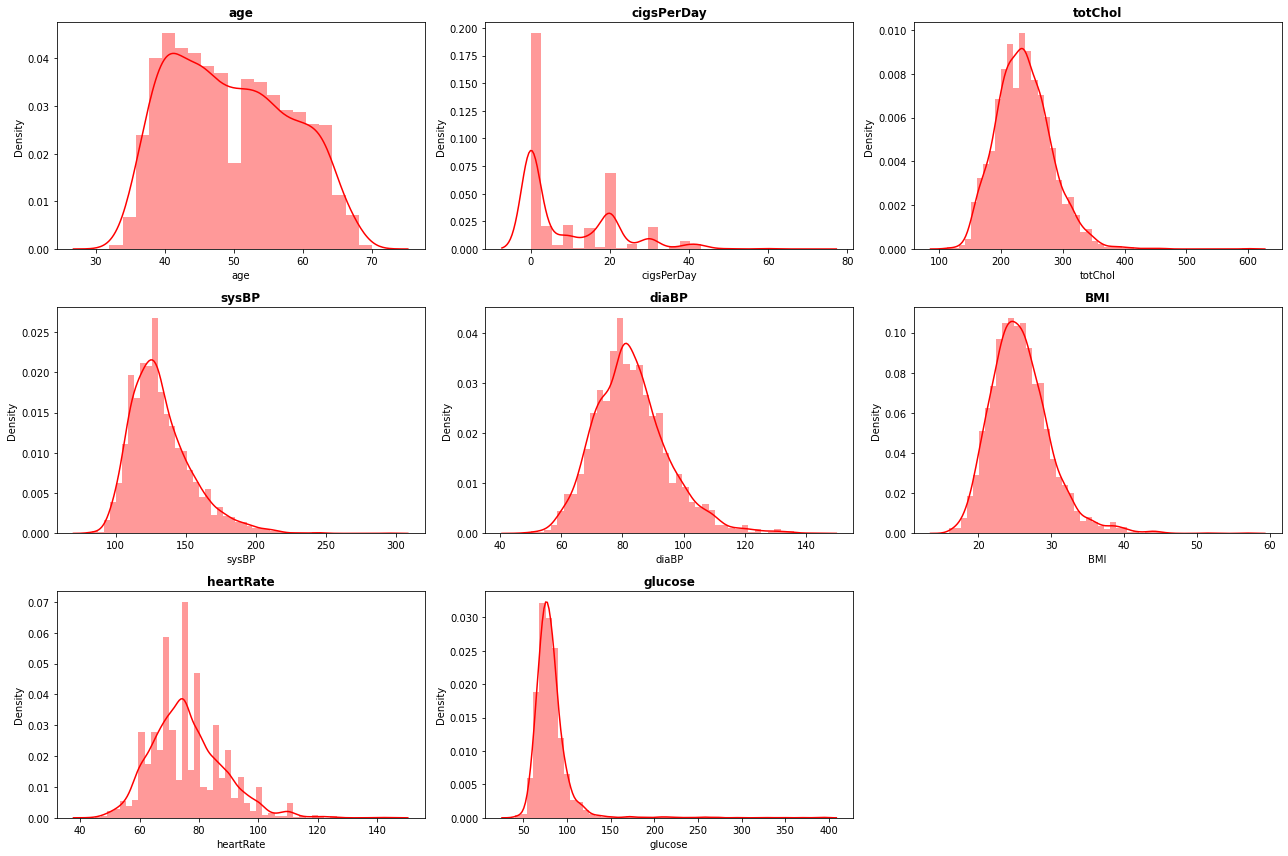

In [ ]:
plt.figure(figsize =(18,12))  #setting the size 

for i,column in enumerate(Numeric_features) :  #Plotting distplot for all the numerical features ...
  plt.subplot(3,3,i+1)  #Subplotting the window for graphs
  sns.distplot(New_df[column], color ='red')
  plt.title(f'{column}', weight='bold')  #setting the title as column name.
  plt.tight_layout()

We can observe that most of the distributions are **right skewed** for numeric features. **totChol (total cholesterol) and BMI** have roughly similar distributions.**Glucose**have a highly right skewed distribution. It shows Glucose has a lot of outliers. Though it is usually a good practice to deal with such outliers, however in this case we can't do much about it as the data is taken through medical survey and the values are patient's health stats, hence those values are absolute and we should not manipulate them. We could have used techniques like Square root transformation, Log tranformation,etc., to convert them to near normal distribution, but since we can't manipulate a medical statistics of a person, it is suggestive to go with the actual values.

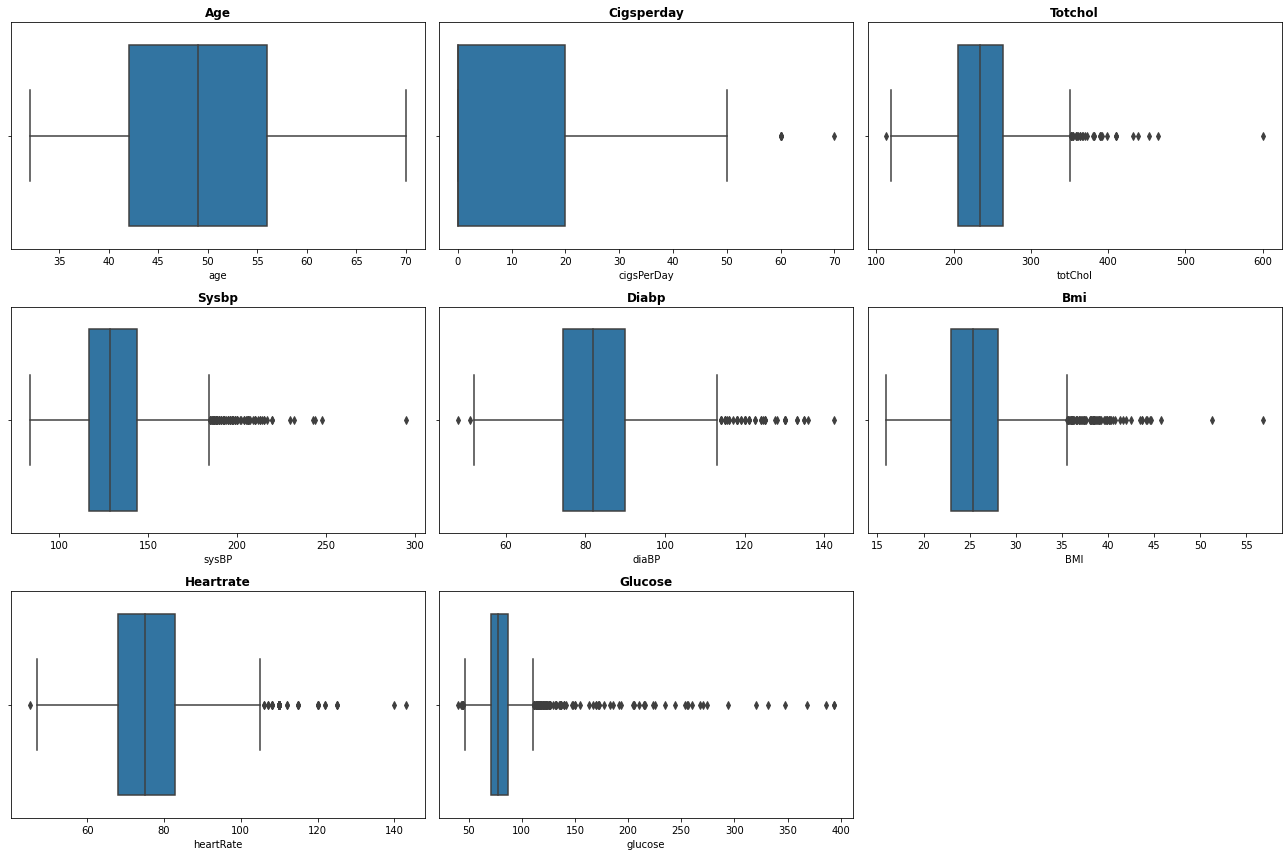

In [ ]:
# Box plot distributions for numeric features.
# Define a figure.
plt.figure(figsize=(18,12))

# plotting subplots for every numeric feature.
for i,column in enumerate(Numeric_features):  # Looping through Numeric_features
  plt.subplot(3, 3, i+1)
  sns.boxplot(New_df[column])   #Plotting BoxPlot for every numeric column
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

As we can see a lot of outliers in **totchol, sysbp, diabp, BMI , Glucose**. As we discussed we cant manipulate the data.If we drop the rows with this outliers we will lose a huge amount og important data so we cant drop them..We can only try to remove borderline outliers(with minimal data loss) which are unlikely to occure (doesnt make sense). 

In [ ]:
# Dropping rows with Cigarette per day greater than 50.
New_df =New_df [New_df["cigsPerDay"] <= 50]

In [ ]:
# Dropping rows with DiaBp greater than 140.
New_df= New_df[New_df['diaBP'] <= 140]

In [ ]:
# Dropping rows with SysBP greater than 250.
New_df = New_df[New_df['sysBP'] <= 250]

In [ ]:
# Dropping rows with heart rate greater than 130.
New_df = New_df[New_df["heartRate"] <= 130]

In [ ]:
# Dropping rows with glucose greater than 300.
New_df = New_df[New_df["glucose"] <= 300]

In [ ]:
# Dropping rows with total cholesterol greater than 500.
New_df = New_df[New_df["totChol"] <= 500]

In [ ]:
New_df  #Observing the daraframe

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


## Univariate Analysis :

The purpose of univariate analysis is to understand the distribution of values for a single variable.

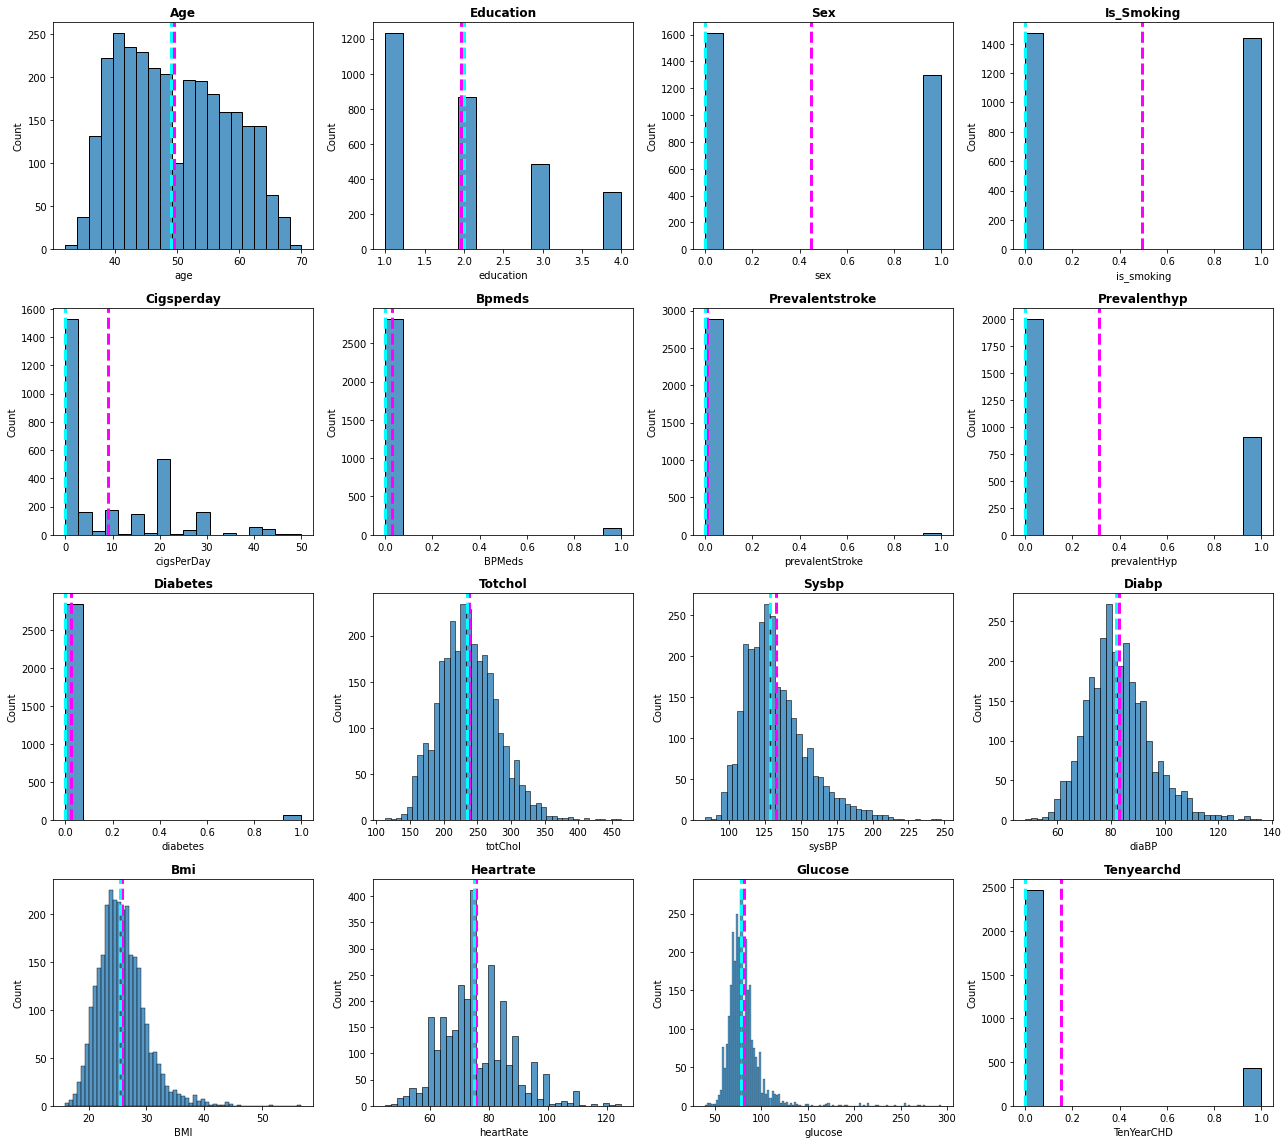

In [ ]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(New_df.columns):
  feature = New_df[column]   #saving all columns in feature variable
  ax=plt.subplot(4, 4, i+1)
  sns.histplot(feature)  #plotting histograms for features 
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=3)  #drawing an axis through mean
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=3)  #drawing an axis through median
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From above histograms we can see how mean and median are positioned in distributions.

## Bivariate Analysis :
Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. 

In our case we'll look for relationships of target variable with all the independent variables.

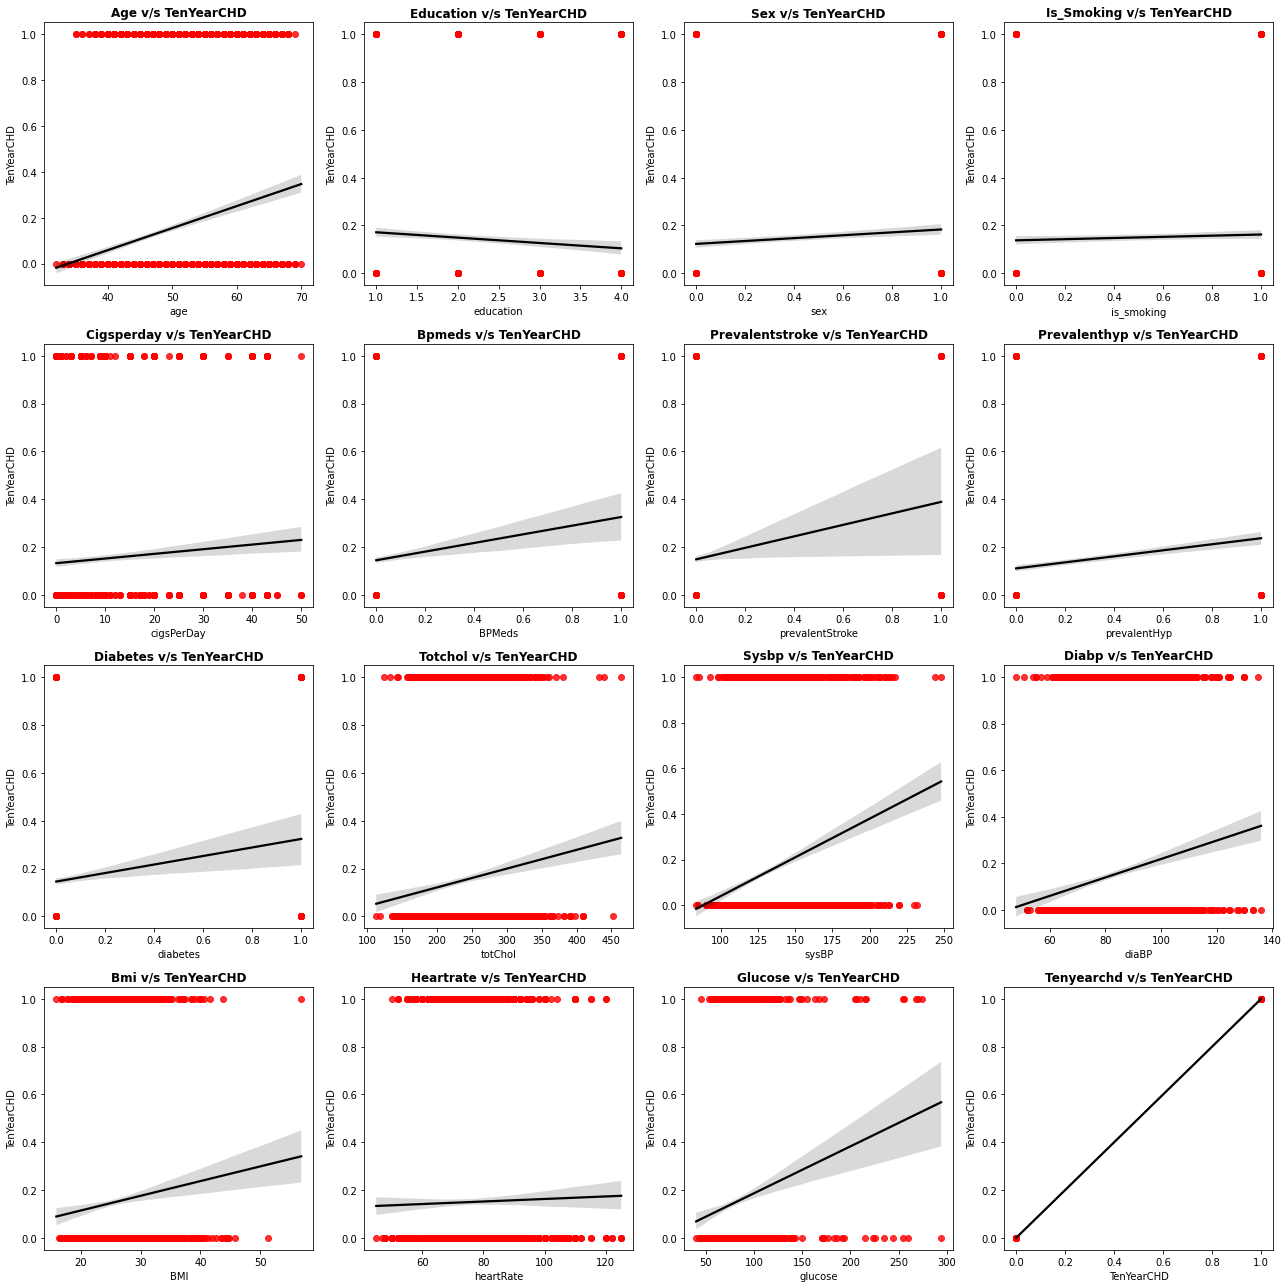

In [ ]:
# Checking Linearity using Bivariate analysis.
# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(New_df.columns ):
  plt.subplot(4, 4, n+1)              #Plottin Subplots
  sns.regplot(x = New_df[column], y =New_df['TenYearCHD'],scatter_kws={"color": 'red'},line_kws={"color": "black"})  #plotting regression plot
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold') # Setting title as column name 
  plt.tight_layout()

As we can see a lot of of Independent variables show relation with our Target variable..